# Prediction of Housing Prices

#### Cheng Zhang, Ahmed Rizk, Xiwen Wei, Aman Mehra

## Introduction

Due to the large growth of the urban population, housing resources seem to be relatively inadequate (Jiang & Qiu, 2022). The trend of housing price has become a topic of great concern among economists and the government because housing price is closely related to each of us (Heldak & Pluciennik, 2019). The factors that can influence the housing price include (not limited to): housing area; the number of bedrooms/bathrooms; whether connected to Main Road; whether it has the basic conditions such as the hot-water heater or air-conditioning. Therefore, our team is going to predict what is the expected yield of a housing price (response variable) at a certain value of those factors (explanatory variables), and figure out which one is the best factor. 

Our project is focused on prediction by using the dataset named Housing Prices Dataset, it contains information about 546 houses with their prices and the influential factors as mentioned before, to be noticed, the factor of the area is the continuous variable and weather connected to Main Road and weather has the basic conditions are categorical variables.


## Analysis Question

## Exploratory Data Analysis

### Reading the data into R

In [1]:
library(tidyverse)
library(gridExtra)
library(GGally)

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflic

In [4]:
data <- read.csv("Housing.csv")

In [5]:
glimpse(data)

Rows: 545
Columns: 13
$ price            <int> 13300000, 12250000, 12250000, 12215000, 11410000, 108~
$ area             <int> 7420, 8960, 9960, 7500, 7420, 7500, 8580, 16200, 8100~
$ bedrooms         <int> 4, 4, 3, 4, 4, 3, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3,~
$ bathrooms        <int> 2, 4, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2,~
$ stories          <int> 3, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,~
$ mainroad         <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes~
$ guestroom        <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "yes~
$ basement         <chr> "no", "no", "yes", "yes", "yes", "yes", "no", "no", "~
$ hotwaterheating  <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no",~
$ airconditioning  <chr> "yes", "yes", "no", "yes", "yes", "yes", "yes", "no",~
$ parking          <int> 2, 3, 2, 3, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2,~
$ prefarea         <chr> "yes", "no", "yes", "yes", "no", "yes", "yes", "no", ~
$ furnishingstatus

### Cleaning and Wrangling

In [6]:
categcols = c('bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus')

In [7]:
data[categcols] = lapply(data[categcols], as.factor)

In [8]:
lapply(data[categcols], levels)

$bedrooms
[1] "1" "2" "3" "4" "5" "6"

$bathrooms
[1] "1" "2" "3" "4"

$stories
[1] "1" "2" "3" "4"

$mainroad
[1] "no"  "yes"

$guestroom
[1] "no"  "yes"

$basement
[1] "no"  "yes"

$hotwaterheating
[1] "no"  "yes"

$airconditioning
[1] "no"  "yes"

$parking
[1] "0" "1" "2" "3"

$prefarea
[1] "no"  "yes"

$furnishingstatus
[1] "furnished"      "semi-furnished" "unfurnished"

### Visualizations

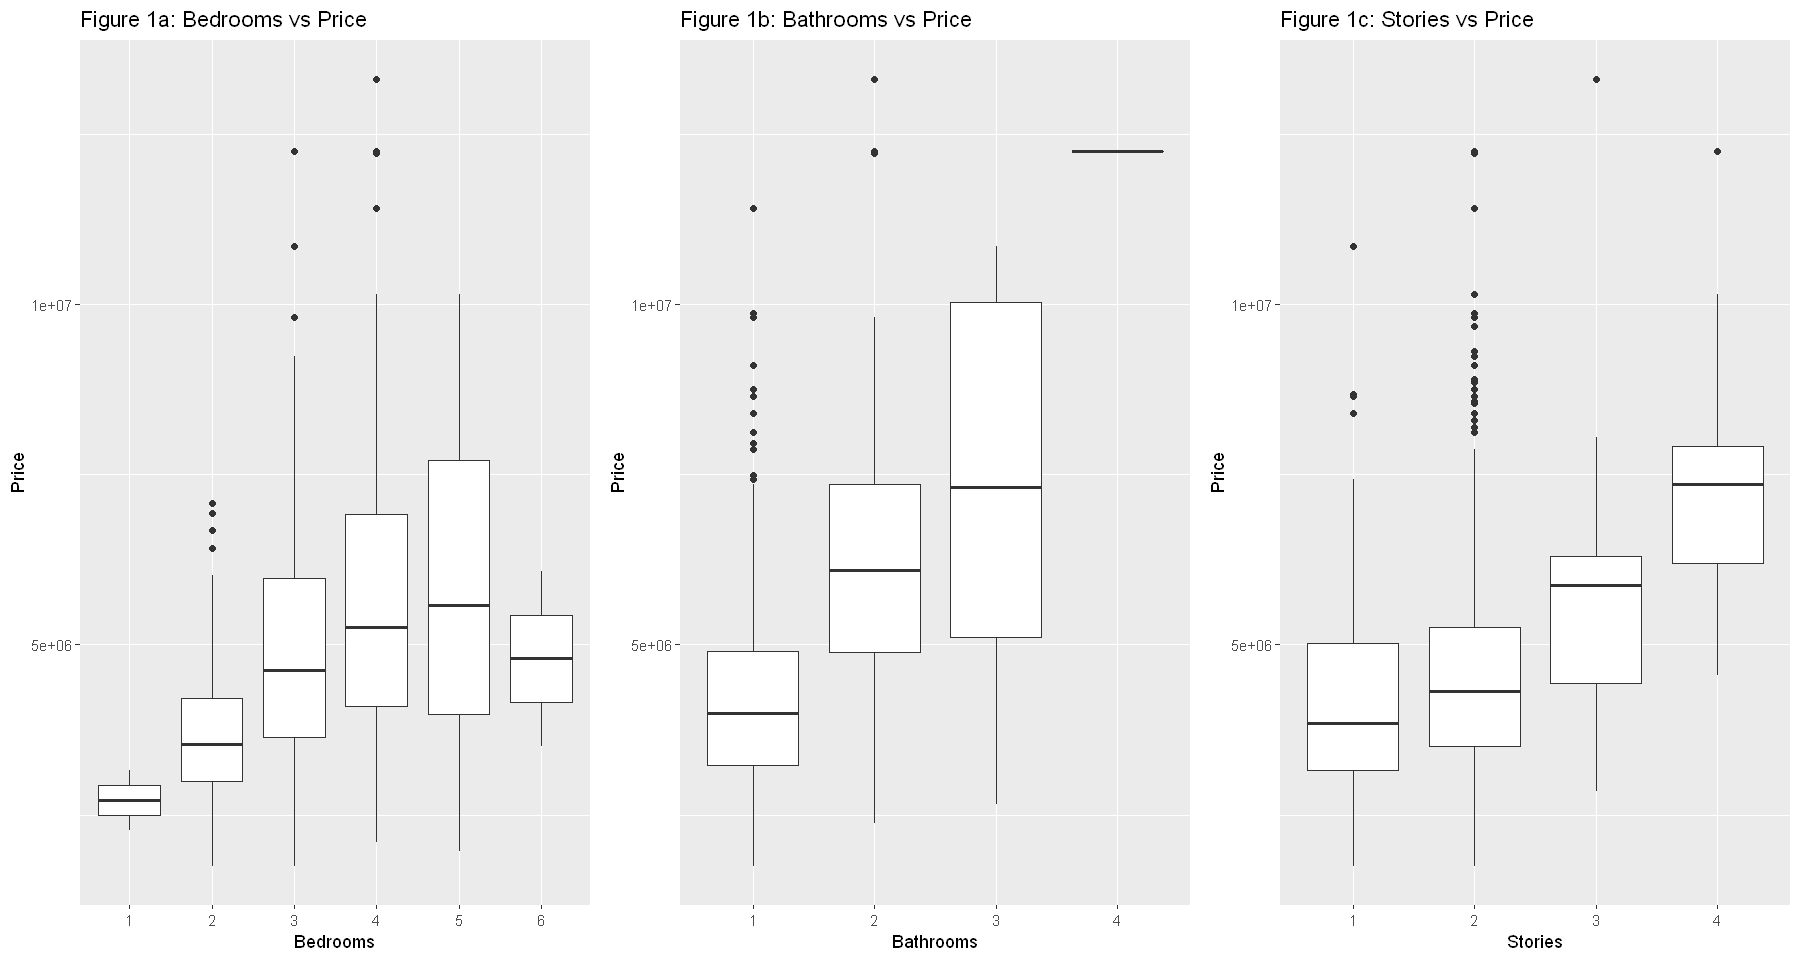

In [9]:
options(repr.plot.width = 15, repr.plot.height = 8) 
bed_box <- ggplot(data, aes(x = bedrooms, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1a: Bedrooms vs Price") + xlab("Bedrooms") + ylab("Price")
bath_box <- ggplot(data, aes(x = bathrooms, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1b: Bathrooms vs Price") + xlab("Bathrooms") + ylab("Price")
stories_box <- ggplot(data, aes(x = stories, y = price)) + geom_boxplot() + 
        ggtitle("Figure 1c: Stories vs Price") + xlab("Stories") + ylab("Price")
grid.arrange(bed_box, bath_box, stories_box, ncol=3, widths = c(6,6,6))

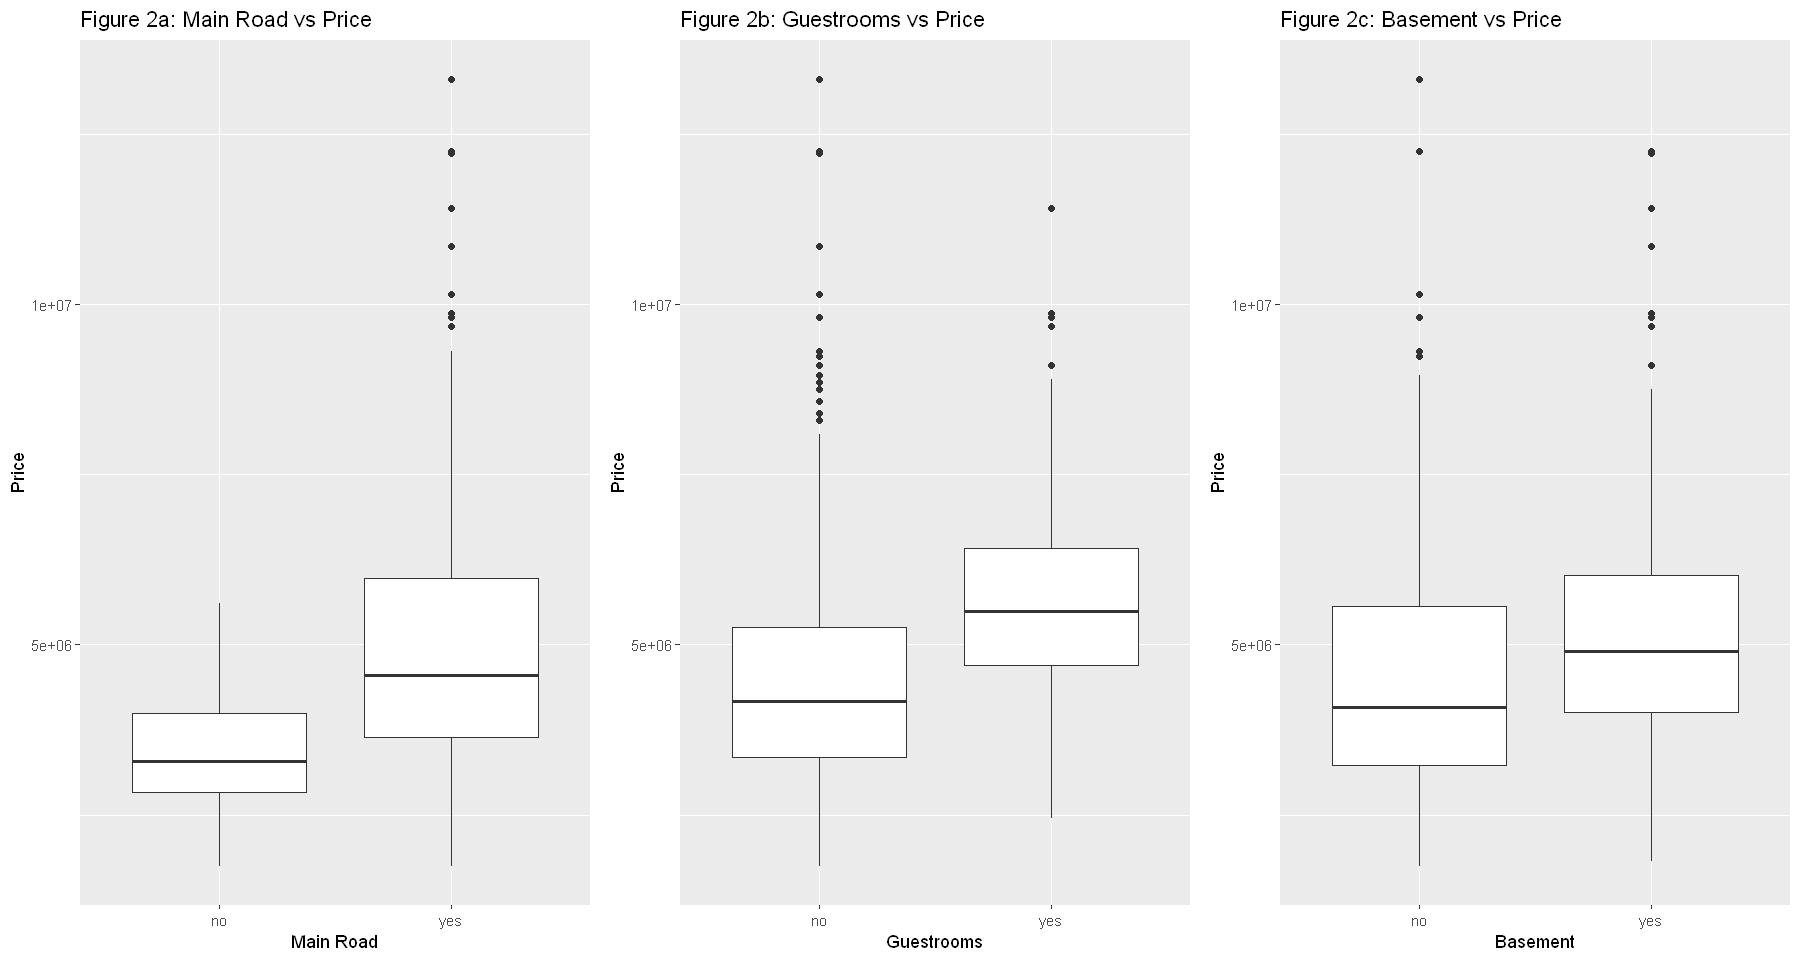

In [10]:
options(repr.plot.width = 15, repr.plot.height = 8) 
main_box <- ggplot(data, aes(x = mainroad, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2a: Main Road vs Price") + xlab("Main Road") + ylab("Price")
guest_box <- ggplot(data, aes(x = guestroom, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2b: Guestrooms vs Price") + xlab("Guestrooms") + ylab("Price")
base_box <- ggplot(data, aes(x = basement, y = price)) + geom_boxplot() + 
        ggtitle("Figure 2c: Basement vs Price") + xlab("Basement") + ylab("Price")
grid.arrange(main_box, guest_box, base_box, ncol=3, widths = c(6,6,6))

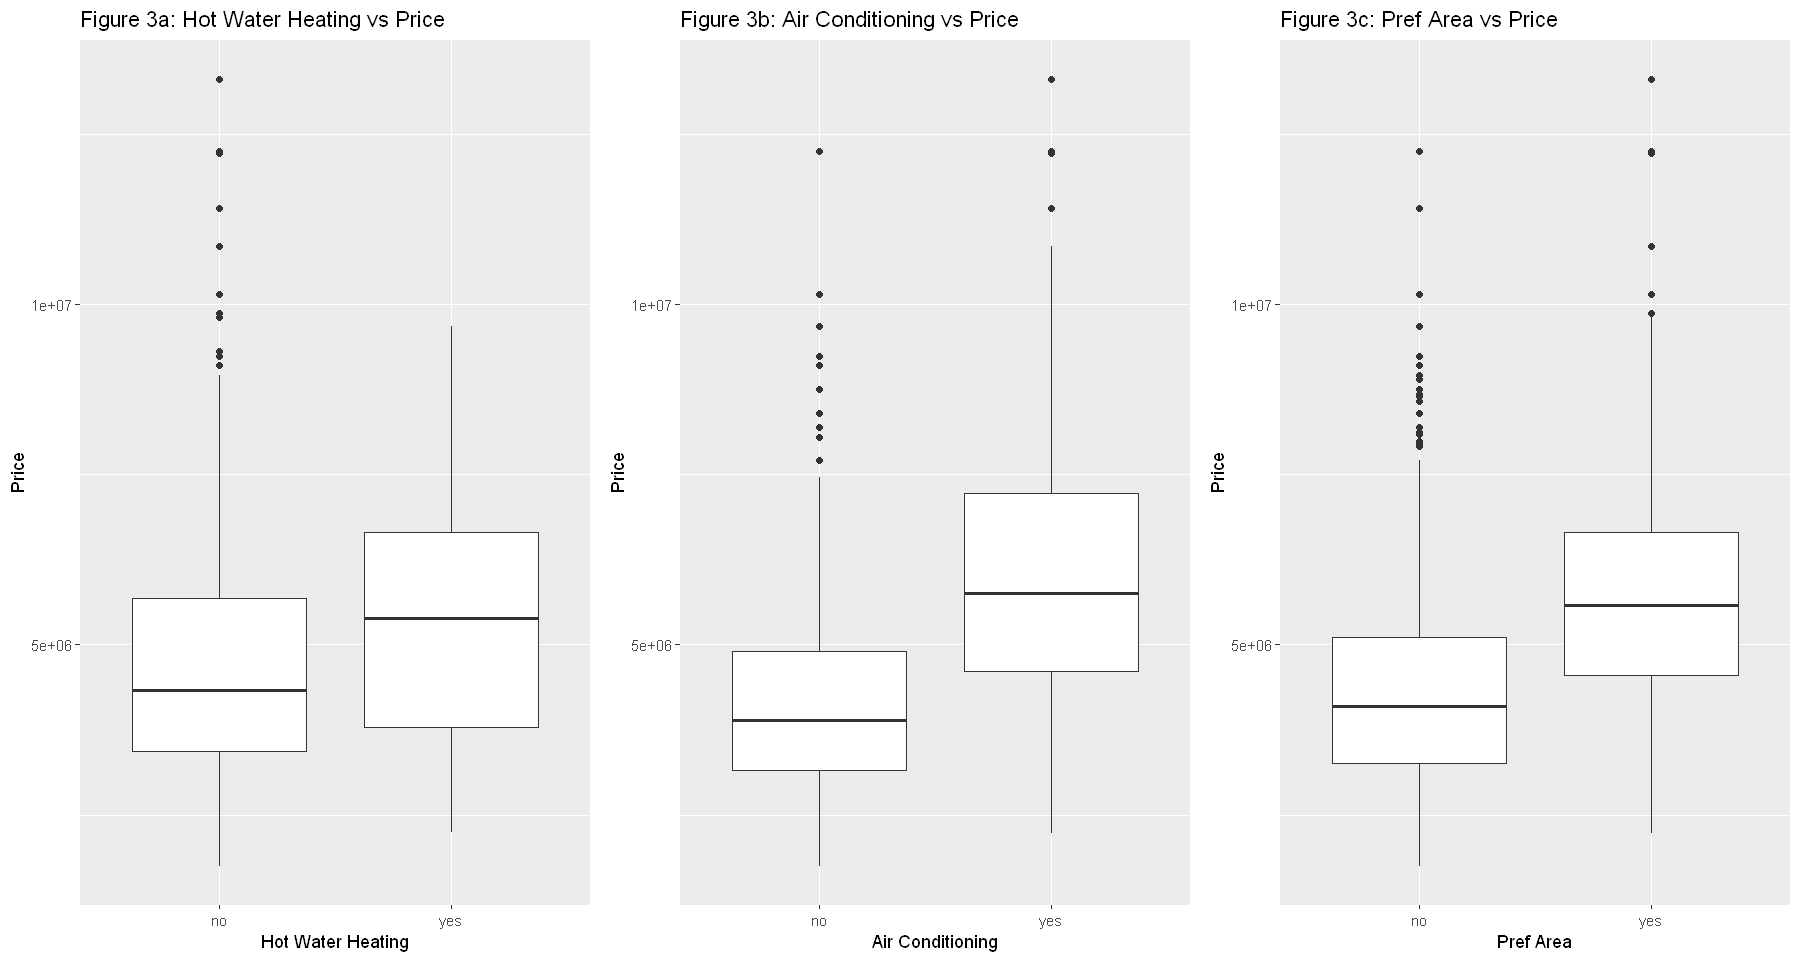

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8) 
hwh_box <- ggplot(data, aes(x = hotwaterheating, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3a: Hot Water Heating vs Price") + xlab("Hot Water Heating") + ylab("Price")
ac_box <- ggplot(data, aes(x = airconditioning, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3b: Air Conditioning vs Price") + xlab("Air Conditioning") + ylab("Price")
prefarea_box <- ggplot(data, aes(x = prefarea, y = price)) + geom_boxplot() + 
        ggtitle("Figure 3c: Pref Area vs Price") + xlab("Pref Area") + ylab("Price")
grid.arrange(hwh_box, ac_box, prefarea_box, ncol=3, widths = c(6,6,6))

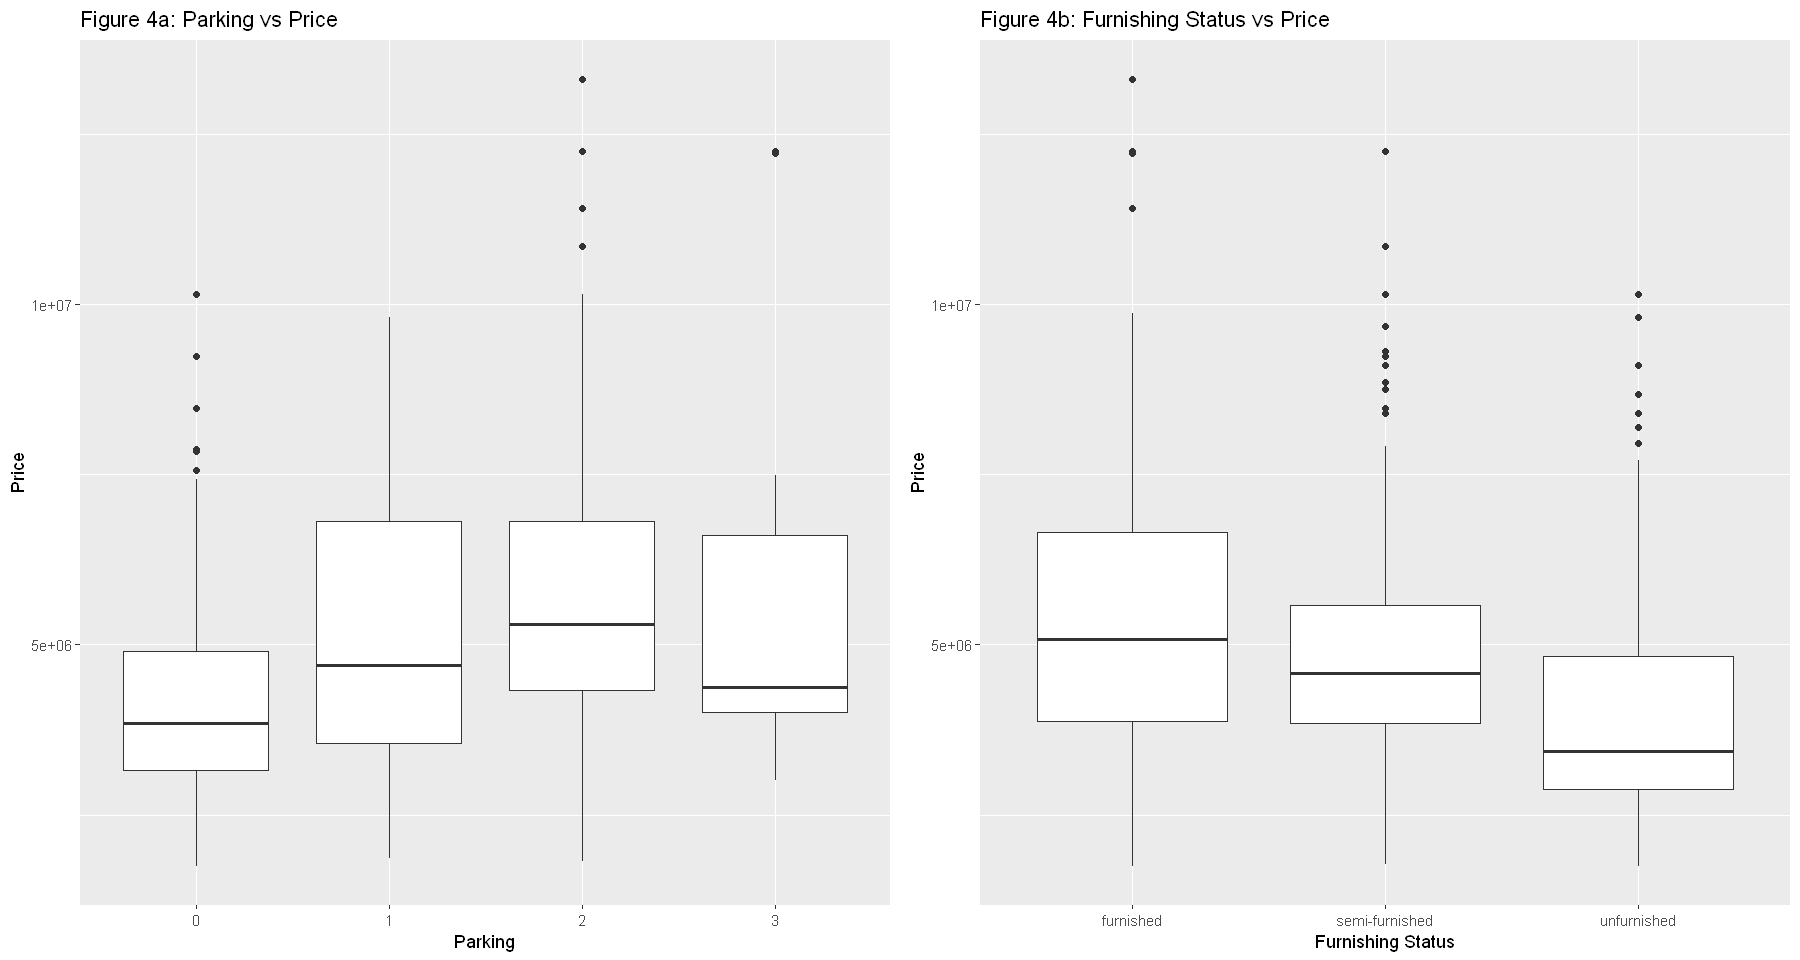

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8) 
parking_box <- ggplot(data, aes(x = parking, y = price)) + geom_boxplot() + 
        ggtitle("Figure 4a: Parking vs Price") + xlab("Parking") + ylab("Price")
fs_box <- ggplot(data, aes(x = furnishingstatus, y = price)) + geom_boxplot() + 
        ggtitle("Figure 4b: Furnishing Status vs Price") + xlab("Furnishing Status") + ylab("Price")
grid.arrange(parking_box, fs_box, ncol=2, widths = c(6,6))

In [13]:
# line graph and correlation of prices/area

In [14]:
# qqnorm prices vs area

## Methods 

### Description of Methods:

1. What do you expect to achieve? 

Find the multicollinearity among the variables and drop those input variables associated with the largest VIFs.
Find the variables which affect the price of a house most.
Find the confidence intervals for predictions to check if it catches the actual value of price.
Compute the mean squared error using the test-set to evaluate the predictive model and choose the best one.

2. What impact could your results have?

Understand the key factors that affect the house prices. As owners, we can increase the room rent reasonably by enhancing the important factors that positively affect the prices. As renters, we can properly analyze the shining points of different types of houses and choose the most cost-effective one.

3. How is the report trustworthy? 

We will deal with the presence of multicollinearity which produces less reliable probability.
We will control the causal confounders to provide an accurate effect estimate.
We will use intervals to describe the uncertainty.
We will select the best variables for the predictive model.


### References

Heldak, M., & Pluciennik, M. (2019). Financing housing support programs in poland in the                                 light of national housing resources. IOP Conference Series. Materials Science and   Engineering, 471(11), 112031. https://doi.org/10.1088/1757-899X/471/11/112031

Jiang, Y., & Qiu, L. (2022). Empirical study on the influencing factors of housing price –––Based on cross-section data of 31 provinces and cities in china. Procedia Computer Science, 199, 1498-1504. https://doi.org/10.1016/j.procs.2022.01.191
